In [1]:
ROOT_DIR = "./"
DATA_DIR = ROOT_DIR + "data/"

DATASET_2016_10a_FILENAME = DATA_DIR + "RML2016.10a_dict.pkl"


In [2]:
import sys
sys.path.append(ROOT_DIR)

import neural_networks
import datasetlib
import traintestsplitlib
import trainlib
import evaluationlib
import dataaugmentationlib
import pickle

import math

2025-05-31 01:33:17.544551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-31 01:33:17.544612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-31 01:33:17.546588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-31 01:33:17.556809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset_df = datasetlib.load_dataset_dataframe(DATASET_2016_10a_FILENAME)

In [4]:
signals = datasetlib.signals(dataset_df)
labels = datasetlib.labels(dataset_df)

# [QPSQ, BPSK, ...]
mods = datasetlib.mods(dataset_df)
# [-18, -16, ...]
snrs = datasetlib.unique_snrs(dataset_df)

In [5]:
with open("../IQ/SCRNN_IQ_acc.pkl", "rb") as fd:
    SCRNN_IQ, SCRNN_IQ_acc = pickle.load(fd)

In [6]:
with open("SCRNN_rotation_acc.pkl", "rb") as fd:
    SCRNN_rotation, SCRNN_rotation_acc = pickle.load(fd)

In [7]:
with open("SCRNN_rotation_tmaxavg_acc.pkl", "rb") as fd:
    SCRNN_rotation_tmaxavg, SCRNN_rotation_tmaxavg_acc = pickle.load(fd)

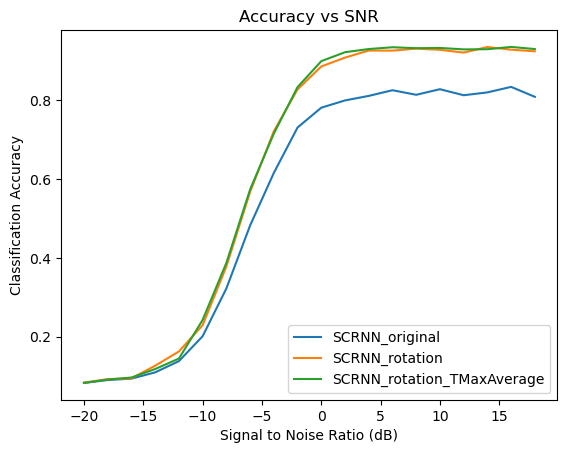

In [9]:
acc_dict = {
    "SCRNN_original": SCRNN_IQ_acc,
    "SCRNN_rotation": SCRNN_rotation_acc,
    "SCRNN_rotation_TMaxAverage": SCRNN_rotation_tmaxavg_acc
}

evaluationlib.accuracy_curve_multi(snrs, acc_dict)
